In [1]:
import h5py
import glob
import numpy as np
from tqdm import tqdm

In [2]:
dataset_path = "data/helen_504/train"

In [3]:
filenames = glob.glob(f"{dataset_path}/*.hdf5")

In [4]:
data = []
for fn in tqdm(filenames):
    sample = h5py.File(fn,'r+')
    demo = sample['data']['demo_0']
    data.append(
        {
            'actions': demo['actions'],
            'obs': demo['obs'],
            "images": demo['obs']['world_camera_low_res_image']
        }
    )
demo.keys()

100%|██████████| 504/504 [00:00<00:00, 690.20it/s]


<KeysViewHDF5 ['actions', 'actions_abs', 'actions_dict', 'obs', 'states']>

In [5]:
demo["obs"].keys()

<KeysViewHDF5 ['box0_pos', 'box0_pos_rel_eef', 'box0_quat', 'box0_quat_rel_eef', 'eef_pos', 'eef_quat', 'gripper_qpos', 'gripper_qvel', 'hand_camera_low_res_image', 'joint_pos', 'joint_vel', 'object', 'world_camera_low_res_image']>

In [6]:
ee_pose = np.concatenate([sample["obs"]["eef_pos"] for sample in data])
actions = np.concatenate([sample["actions"] for sample in data])

In [24]:
img_key = "world_camera_low_res_image"

In [25]:
imgs = np.concatenate([sample["obs"][img_key] for sample in data])

In [23]:
import os
import imageio
from IPython.display import Video, display
os.environ["IMAGEIO_FFMPEG_EXE"] = "/usr/bin/ffmpeg"

imageio.mimwrite('tmp.mp4', imgs[:250])
# display(Video('tmp.mp4'))

In [12]:
imgs

NameError: name 'imgs' is not defined

In [11]:
import numpy as np
import plotly.graph_objects as go

# Sample 3D data
x, y, z = ee_pose[:, 0], ee_pose[:, 1], ee_pose[:, 2]
x, y, z = ee_pose[10:50, 0], ee_pose[10:50, 1], ee_pose[10:50, 2]

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers',
                                   marker=dict(size=3,
                                               color=actions[:,-1]*-1, # z,  # set color to an array/list of desired values
                                               #colorscale='inferno',  # choose a colorscale
                                               opacity=0.8))])

# Make the plot interactive by allowing user to rotate, zoom, etc.
fig.update_layout(scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'),
                  width=700,
                  margin=dict(r=20, b=10, l=10, t=10))

fig.show()


Text(0, 0.5, 'x')

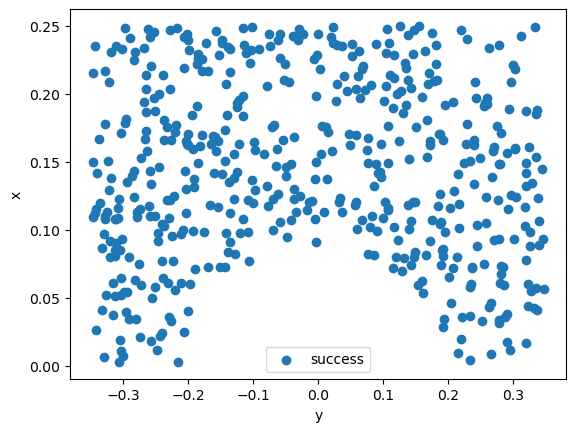

In [ ]:
import matplotlib.pyplot as plt

# poss = [pos for pos in poses[:,:3]]
# poss = np.stack(poss)
poss = np.stack([sample["obs"]["box0_pos"][0] for sample in data])


plt.scatter(poss[:,1], poss[:,0], color="tab:blue", label="success")
plt.legend()
plt.xlabel("y")
plt.ylabel("x")

In [ ]:
ee_pose.shape

(24722, 3)

In [ ]:
file_names = glob.glob(f"{dataset_path}/episode_*.npy")
assert len(file_names) > 0, f"WARNING: no data in {dataset_path}!"

data = []
for file in tqdm(file_names):
    data.append(np.load(file, allow_pickle=True))

AssertionError: WARNING: no data in data/helen_504/train!

In [ ]:
np.array(data["data"]["demo_0"]["obs"]["box0_pos"])

array([[ 0.11721217, -0.26061994, -0.00500003],
       [ 0.11721218, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.00500003],
       [ 0.11721219, -0.26061994, -0.005

In [ ]:
eef_pos, eef_quat, gripper_qpos, joint_pos

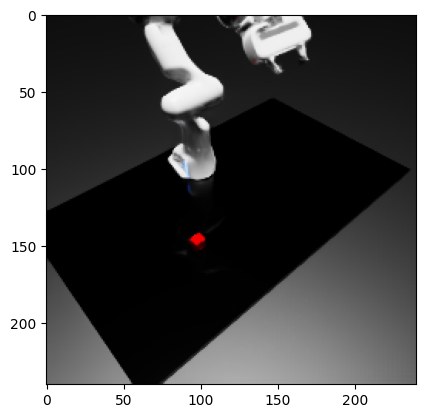

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[0])